<a href="https://colab.research.google.com/github/kwanda2426/unsupervised-predict-streamlit-template/blob/master/Team_14%20notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://explore-datascience.net/images/images_admissions2/main-logo.jpg">

<img src="https://github.com/Explore-AI/Pictures/blob/master/sql_tmdb.jpg?raw=true" width=90%/>

# Streamlit-based Movie Recommender System

## Team_14 :
- #### Rinae Tshivhidzo
- #### Nokulunga Twala (Team leader)
- #### Tshegofatso Sekgobela 
- #### Tsepo Sehaole 
- #### Kwanda Mazibuko

## Table of contents
1. [Introduction](#intro)
2. [Data Collection](#data)
3. [Data Preprocessing](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Feature Engineering And Selection](#features)
6. [Model Building And Evaluation](#model)
7. [Model Hyperparameter Tuning](#tuning)
8. [Conclusion](#conclusion)
9. [References](#references)
 

<a id="intro"></a>
# 1. **Introduction**

In our daily life when we are shopping online, or looking for a movie to watch, we normally ask our friends or search for it. And when they recommend something that we do not like yet they enjoyed it. what a waste of time right. So what about if there is a system that can understand you, and recommend for you based on your interests, that would be so cool.

The growth of the internet has resulted in an enormous amount of online data and information available to us. Tools like a recommender system allow us to filter the information which we want or need. Recommender systems can be utilized in many contexts, one of which is a playlist generator for video, movie or music services. 
Recommendation systems are becoming increasingly important in today’s extremely busy world. People are always short on time with the myriad tasks they need to accomplish in the limited 24 hours. Therefore, the recommendation systems are important as they help them make the right choices, without having to expend their cognitive resources.

### **Problem Statement**
In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals are exposed to the content that is relevant to them in one way or another. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options. If customers are not exposed to a content relevant to them, may decide to look for alternatives which may provide better content.

### **Objectives**

The key objective is to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

### **Literature Review**

**What are recommender systems?**

Simply put, recommender systems are the systems that are designed to recommend things to the user based on many different factors. These systems predict the most likely product that the users are most likely to purchase and are of interest to. Companies like Netflix, Amazon, etc. use recommender systems to help their users to identify the correct product or movies for them. 

The purpose of a recommendation system basically is to search for content that would be interesting to an individual. Moreover, it involves a number of factors to create personalised lists of useful and interesting content specific to each user. Recommendation systems are Artificial Intelligence based algorithms that skim through all possible options and create a customized list of items that are interesting and relevant to an individual. These results are based on their profile, search/browsing history, what other people with similar traits/demographics are watching, and how likely are you to watch those movies. This is achieved through predictive modeling and heuristics with the data available.

#### **Content-Based Filtering**

Content-based filtering is a type of recommender system that attempts to guess what a user may like based on that user's activity. Content-based filtering makes recommendations by using keywords and attributes assigned to objects in a database (e.g., items in an online marketplace) and matching them to a user profile.

**Why use content-based filtering?**
- No data from other users is required to start making recommendations.
- Recommendations are highly relevant to the user.
- You avoid the “cold start” problem.
- Recommendations are transparent to the user. Highly relevant recommendations send a message of openness to the user, bolstering their trust level in offered recommendations.


**Challenges of content-based filtering**
- There’s a lack of novelty and diversity.
- Scalability is a challenge. Every time a new product or service or new content is added, its attributes must be defined and tagged.
- Attributes may be incorrect or inconsistent. Content-based recommendations are only as good as the subject-matter experts tagging items.


#### **Collaborative Filtering**
The idea behind collaborative filtering is to consider users’ opinions on different videos and recommend the best video to each user based on the user’s previous rankings and the opinion of other similar types of users.

**Why use collaborative filtering?**
- It does not need a movie’s side knowledge like genres.
- It uses information collected from other users to recommend new items to the current user.
- Even when no information on an item is available, we still can predict the item rating without waiting for a user to purchase it.
- Captures the change in user interests over time: Focusing solely on content does not provide any flexibility on the user's perspective and their preferences.


**Challenges of collaborative filtering**
- Cannot handle well fresh items with no ratings.
- Hard to include side features for query/item.
- Cannot handle well fresh users with no relations to other users.




<a id="data"></a>
# 2. **Data Collection**

## **Import Libraries**

In [ ]:
%pip install comet_ml
%pip install surprise
%pip install recmetrics

In [ ]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="cDBGt9YOCyyinNTUvxRUB3hxd",
    project_name="streamlit-based-movie-recommender-system",
    workspace="kwanda2426",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/kwanda2426/streamlit-based-movie-recommender-system/b06b618048fa40729db7ea484aa2ed46



We use comet to run different experiments while saving the important hyperparameter settings.

In [ ]:

# Data manipulation
import pandas as pd
import numpy as np

# datetime
import datetime

# Libraries for data preparation and model building
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import PCA

from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import BaselineOnly, CoClustering
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
import recmetrics
from sklearn.preprocessing import MaxAbsScaler
from surprise.accuracy import rmse
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
# saving model
import pickle

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#making sure that we can see all rows and cols
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

### **Loading Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The basic process of loading data from a CSV file into a Pandas DataFrame (with all going well) is achieved using the “read_csv” function in Pandas.

In [ ]:
# imdb
imdb_df = pd.read_csv('/content/drive/MyDrive/data /imdb_data.csv')

# movies
movies_df = pd.read_csv('/content/drive/MyDrive/data /movies.csv')

# tags 
tags_df = pd.read_csv('//content/drive/MyDrive/data /tags.csv')

# train 
train = pd.read_csv('/content/drive/MyDrive/data /train.csv')

# test
test = pd.read_csv('/content/drive/MyDrive/data /test.csv')

#links
links = pd.read_csv('/content/drive/MyDrive/data /links.csv')

#genome scores
g_scores = pd.read_csv('/content/drive/MyDrive/data /genome_scores.csv')

#genome tags
g_tags = pd.read_csv('/content/drive/MyDrive/data /genome_tags.csv')


#### Data overview

This gives an overview of the dataset that is more interesting than the others, i.e imdb, movies, train and test datasets.

**IMDB Dataset**

In [ ]:
# Checking how our imdb dataset looks like
print("Rows    : ", imdb_df.shape[0])

print("Columns : ", imdb_df.shape[1])

print("\nMissing values: ", imdb_df.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", imdb_df.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in imdb_df.columns:
    unique_out = len(imdb_df[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  27278
Columns :  6

Missing values:  62481

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB
  
 None

About the data: 

Feature 'movieId' has 27278 unique categories
Feature 'title_cast' has 17144 unique categories
Feature 'director' has 11787 unique categories
Feature 'runtime' has 275 unique categories
Feature 'budget' has 1363 unique categories
Feature 'plot_keywords' has 16009 unique categories


**Movies Dataset**

In [ ]:
# Checking how our movies dataset looks like
print("Rows    : ", movies_df.shape[0])

print("Columns : ", movies_df.shape[1])

print("\nMissing values: ", movies_df.isnull().sum())

print("\nInformation about the data: ")
print("  \n", movies_df.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in movies_df.columns:
    unique_out = len(movies_df[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  62423
Columns :  3

Missing values:  movieId    0
title      0
genres     0
dtype: int64

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
  
 None

About the data: 

Feature 'movieId' has 62423 unique categories
Feature 'title' has 62325 unique categories
Feature 'genres' has 1639 unique categories


**Tags Dataset**

In [ ]:
# Checking how our tags dataset looks like
print("Rows    : ", tags_df.shape[0])

print("Columns : ", tags_df.shape[1])

print("\nMissing values: ", tags_df.isnull().sum())

print("\nInformation about the data: ")
print("  \n", tags_df.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in tags_df.columns:
    unique_out = len(tags_df[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  1093360
Columns :  4

Missing values:  userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB
  
 None

About the data: 

Feature 'userId' has 14592 unique categories
Feature 'movieId' has 45251 unique categories
Feature 'tag' has 73051 unique categories
Feature 'timestamp' has 907730 unique categories


**Train Dataset**

In [ ]:
# Checking how our train dataset looks like
print("Rows    : ", train.shape[0])

print("Columns : ", train.shape[1])

print("\nMissing values: ", train.isnull().sum())

print("\nInformation about the data: ")
print("  \n", train.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in train.columns:
    unique_out = len(train[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  10000038
Columns :  4

Missing values:  userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB
  
 None

About the data: 

Feature 'userId' has 162541 unique categories
Feature 'movieId' has 48213 unique categories
Feature 'rating' has 10 unique categories
Feature 'timestamp' has 8795101 unique categories


**Test Dataset**

In [ ]:
# Checking how our test dataset looks like
print("Rows    : ", test.shape[0])

print("Columns : ", test.shape[1])

print("\nMissing values: ", test.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", test.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in test.columns:
    unique_out = len(test[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  5000019
Columns :  2

Missing values:  0

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB
  
 None

About the data: 

Feature 'userId' has 162350 unique categories
Feature 'movieId' has 39643 unique categories


**Links Dataset**

In [ ]:
# Checking how our links dataset looks like
print("Rows    : ", links.shape[0])

print("Columns : ", links.shape[1])

print("\nMissing values: ", links.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", links.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in links.columns:
    unique_out = len(links[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  62423
Columns :  3

Missing values:  107

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB
  
 None

About the data: 

Feature 'movieId' has 62423 unique categories
Feature 'imdbId' has 62423 unique categories
Feature 'tmdbId' has 62282 unique categories


**Genome Scores Dataset**

In [ ]:
# Checking how our g_scores dataset looks like
print("Rows    : ", g_scores.shape[0])

print("Columns : ", g_scores.shape[1])

print("\nMissing values: ", g_scores.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", g_scores.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in g_scores.columns:
    unique_out = len(g_scores[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  15584448
Columns :  3

Missing values:  0

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB
  
 None

About the data: 

Feature 'movieId' has 13816 unique categories
Feature 'tagId' has 1128 unique categories
Feature 'relevance' has 4000 unique categories


<a id="cleaning"></a>
## 3. **Data Preprocessing**

Data preprocessing is a technique that involves taking in raw data and transforming it into a understandable format and useful. The technique includes data cleaning, intergration, transformation, reduction and discretization. The data preprocessing plan will include the following processes:

- **Data cleaning**

- **Table merging process**

- **Dealing with missing values**

### Data cleaning

Data cleaning is important because it improves your data quality and in doing so, increases overall productivity. When you clean your data, all outdated or incorrect information is gone – leaving you with the highest quality information. We aim to determine inaccurate, incomplete, or unreasonable data and then improve quality by correcting detected errors and omissions.

In [ ]:
# create copies of the dataframes

imdb_df = imdb_df.copy()
movies_df = movies_df.copy()
train_df = train.copy()
test_df = test.copy()

In [ ]:
# merging dataframe

train_df = pd.merge(movies_df, imdb_df, on = 'movieId')

### Checking for missing values

The problem of missing value is quite common in many real-life datasets. Missing value can bias the results of the machine learning models and/or reduce the predictive accuracy of the model, hence it is crucial to know how much is missing and what to do with that.

In [ ]:
# Percentage of missing values
(train_df.isnull().sum()/len(train_df))*100

movieId           0.000000
title             0.000000
genres            0.000000
title_cast       38.868334
director         38.281187
runtime          45.624548
budget           70.711011
plot_keywords    42.153945
dtype: float64

We can see that **title_cast** is missing about **36.9%**, the **director** column is missing **36.2%**, **runtime** is missing **44.3%**, **budget** is missing **71.0%**, **plot_keywords** is missing **40.6%**.
The **budget** column since we missing a lot of data we will **drop** the column since **we can't make reliable analysis on it** and the others we can't impute reliable like the cast. The function that removes noise deals with the missing values.

#### Removing noise

Data that can not be processed/interpreted by a machine is classified as noisy data. Text data contain a lot of noise, this comes in a form of special characters such as hashtags, punctuation and numbers.

- We start by changing the datatype of text data to string for better handling and manipulation.

In [ ]:
# change data types
train_df['genres'] = train_df.genres.astype(str)
train_df['title_cast'] = train_df.title_cast.astype(str)
train_df['director'] = train_df.director.astype(str)
train_df['plot_keywords'] = train_df.plot_keywords.astype(str)

- Change the text to lower case.

- Replace the vertical bar with a comma.

In [ ]:
# Every genre is separated by a | 
train_df['genres'] = train_df['genres'].map(lambda x: x.lower().split('|'))

# Every title cast is separated by a | so we simply have to call the split function on | and separate them by ,
train_df['title_cast'] = train_df['title_cast'].str.split('|')

# And we will do the same thing for the plot keywords
train_df['plot_keywords'] = train_df['plot_keywords'].str.split('|')

Combine the name and surname in the title_cast and director columns, hence creating one word for the uniqueness of a person's name. If no name exists, the function will leave a space.

In [ ]:
def string_function(x):
    """combines name and surname into one name
    and return results as one name.
    
    if no name exists returns a space"""
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
cols = ['title_cast','director']

for col in cols:
    train_df[col] = train_df[col].apply(string_function)

The resulting data has every text column in lower case, separated by a comma. The name and surname combined for title_cast and director columns.

<a id="EDA"></a>
## 4. **Exploratory Data Analysis**

An Exploratory Data Analysis is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.

### Splitting the genres and title casts into lists

In order to be able to extract the release year for Data Visualiation, will extract the realeased year from the title column. Will further split the title cast into lists.

In [ ]:
#extracting released year
movies = movies_df.copy()
movies['release_year']=movies['title'].str[-5:-1] 
#spliting the genres into a list
movies['genres']=movies['genres'].str.split('|') 
#concatinate ratings with movies dataframe
movies.dropna() 
movies.head(3)

,movieId,title,genres,release_year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995


In [ ]:
#spliting the title cast into a list
imdb = imdb_df.copy()
imdb['title_cast']=imdb['title_cast'].str.split('|') 
imdb.head(3)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry


### Merging datasets

In [ ]:
train_eda = train_df.copy()
con = pd.concat([train_df[:1000],movies], axis=1)
con.head()

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,movieId,title,genres,release_year
0,1.0,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]","[tomhanks, timallen, donrickles, jimvarney, wa...",johnlasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]",1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2.0,Jumanji (1995),"[adventure, children, fantasy]","[robinwilliams, jonathanhyde, kirstendunst, br...",jonathanhensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]",2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995
2,3.0,Grumpier Old Men (1995),"[comedy, romance]","[waltermatthau, jacklemmon, sophialoren, ann-m...",markstevenjohnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]",3,Grumpier Old Men (1995),"[Comedy, Romance]",1995
3,4.0,Waiting to Exhale (1995),"[comedy, drama, romance]","[whitneyhouston, angelabassett, lorettadevine,...",terrymcmillan,124.0,"$16,000,000","[black american, husband wife relationship, be...",4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995
4,5.0,Father of the Bride Part II (1995),[comedy],"[stevemartin, dianekeaton, martinshort, kimber...",alberthackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]",5,Father of the Bride Part II (1995),[Comedy],1995


In [ ]:
df= pd.concat([imdb,con], axis=1)
df.dropna(inplace=True)
df.head(3)

,movieId,title_cast,director,runtime,budget,plot_keywords,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,movieId,title,genres,release_year
0,1.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1.0,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]","[tomhanks, timallen, donrickles, jimvarney, wa...",johnlasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]",1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,2.0,Jumanji (1995),"[adventure, children, fantasy]","[robinwilliams, jonathanhyde, kirstendunst, br...",jonathanhensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]",2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995
2,3.0,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry,3.0,Grumpier Old Men (1995),"[comedy, romance]","[waltermatthau, jacklemmon, sophialoren, ann-m...",markstevenjohnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]",3,Grumpier Old Men (1995),"[Comedy, Romance]",1995


In [ ]:
# Merging the trian  and movies data
data = pd.merge(train, movies, on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres,release_year
0,5163,57669,4.0,1518349992,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
1,87388,57669,3.5,1237455297,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
2,137050,57669,4.0,1425631854,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
3,120490,57669,4.5,1408228517,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
4,50616,57669,4.5,1446941640,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008


### Data Visualisation 

Data visualization allows business users to gain insight into their vast amounts of data. It benefits them to recognize new patterns and errors in the data. Making sense of these patterns helps the users pay attention to areas that indicate red flags or progress. This process, in turn, drives the business ahead.

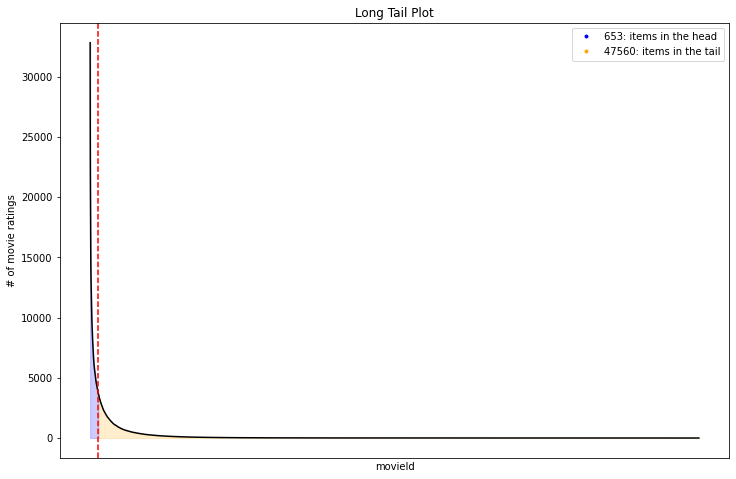

In [ ]:
fig = plt.figure(figsize=(12, 8))
recmetrics.long_tail_plot(df=data, 
            item_id_column="movieId", 
             interaction_type="movie ratings", 
           percentage=0.5,
           x_labels=False)

The plot shows the distribution of ratings/movie popularity with 653 popular movies and 45760 unpopular movies.

**Movie Ratings from the User**

A rating is a valuation or rank on a scale. In this section will be visualising the distribution of movie ratings from the user. 

In [ ]:
# No of ratings per users
no_of_rated_movies_per_user = data.groupby(by = "userId")["rating"].count().sort_values(ascending = False)

no_of_rated_movies_per_user.head()

userId
72315     12952
80974      3680
137293     3588
33844      3208
20055      3050
Name: rating, dtype: int64

The user who have rated most movies with 12952 ratings is user no 72315

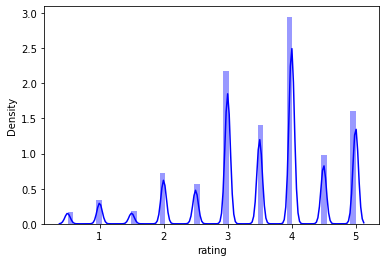

In [ ]:
# Distplot of ratings 
sns.distplot(data["rating"], color='blue');

Most movies recieved ratings of 4, while others recieved less. It was expected that there would be a normal distrubtion with a mean rating of 3. Instead, we observe that users tend to rate movies quite favourably and tend to avoid negative ratings. This skew might be explained by the tendency of users to rate movies they liked. In other words, if a user doesn't like a movie, it is unlikely that they will watch it through to the end, let alone rate it.

**Exploring Movie Genres**

Film genres are categories that define a movie based on its narrative elements. Each genre is unique in the types of stories they tell. Genres have changed and evolved over time, creating several subgenres that further define the filmmaking styles. In this section will be looking at the top genres from the dataset.

In [ ]:
# Ploting top genres in the Dataset
plt.figure(figsize=(20, 10))
gen = data['genres'].explode()
ax=sns.countplot(x=gen, order=gen.value_counts().index[:30],color='blue')
ax.set_title('Popular Genres', fontsize=15)
plt.xticks(rotation =90)
plt.show()

Drama, Comedy and Thriller are top 3 most common movie genres.

#### Movies made per year 

Film as an art form has drawn on several earlier traditions in the fields such as (oral) storytelling, literature, theatre and visual arts. 
The dataset has 48213 movies avalable to us. it is reasonable to assume that it does include almost every major film released during those years with this assumptions in mind, let us take a look at the number of movies produced by the year. In this section will be looking at how many movies are released per year. 

Text(0.5, 1.0, 'Total Movies Released per Year')

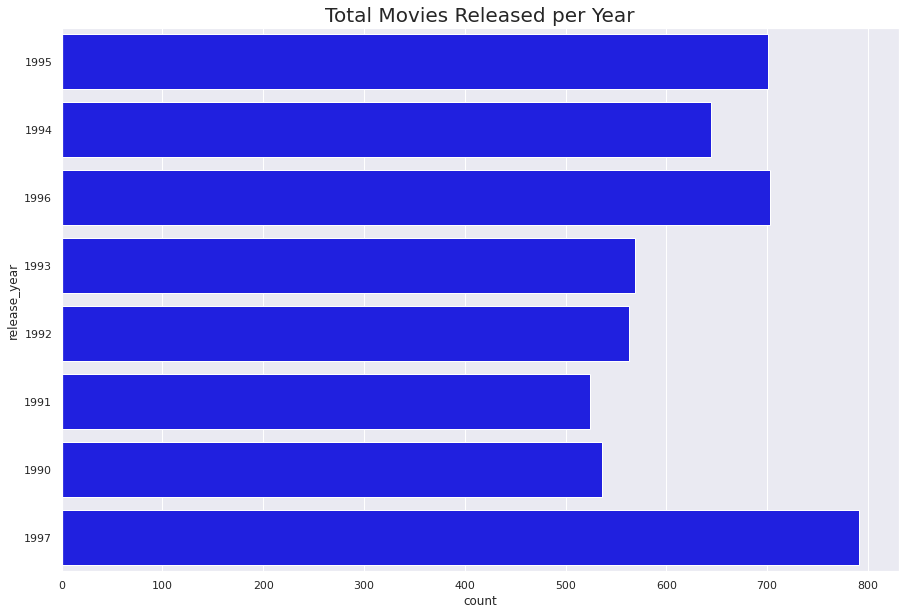

In [ ]:
# Plot movies released per year
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(y=movies['release_year'], data=df, order=df['release_year'].value_counts().index[0:30],color='blue')
ax.set_title('Total Movies Released per Year', fontsize= 20)

from 1995 The number of movies released each year increased, whereas it was previously fluctuating.

#### Popular Cast Members 

The cast of a play or film is all the people who act in it. Let us now explore the cast of our movies.

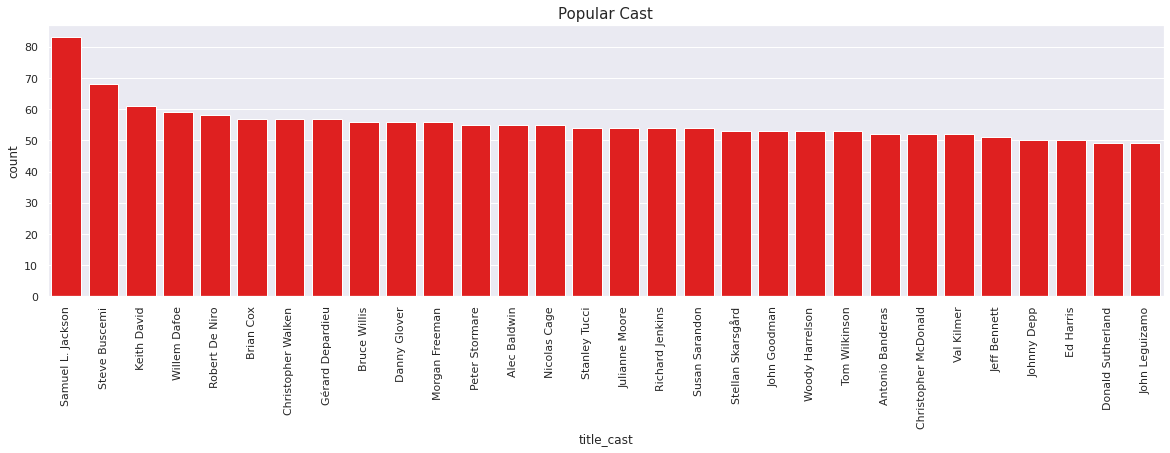

In [ ]:
# Plot popular cast
plt.figure(figsize = (20,5))
cast=imdb['title_cast'].explode()
ax=sns.countplot(x=cast, order = cast.value_counts().index[:30],color='red')
ax.set_title('Popular Cast',fontsize=15)
plt.xticks(rotation=90)
plt.show()

The most well-known cast members are Samuel L. Jackson and Steve Buscemi, with the remaining members having a slight variation in recognition.

### Movie Runtime

In [ ]:
# Describe the runtime 
df['runtime'].describe()

,runtime,runtime
count,339.000000,339.000000
mean,109.498525,109.191740
std,18.291585,17.626511
min,76.000000,78.000000
25%,97.000000,97.000000
50%,107.000000,107.000000
75%,118.000000,117.500000
max,192.000000,192.000000


<AxesSubplot:ylabel='Density'>

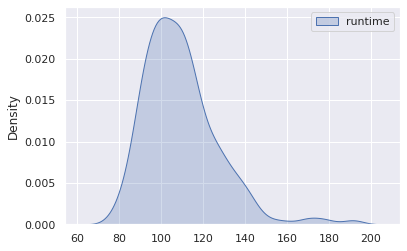

In [ ]:
#Plot the Runtime
sns.set(style="darkgrid", )
sns.kdeplot(data=df['runtime'], shade=True, color='red')

#### Long Movies

In [ ]:
#Show movies with long lengths 
con[con['runtime'] > 0][['runtime', 'title', 'release_year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,title,release_year
522,195.0,Schindler's List (1993),Schindler's List (1993),1993
13,192.0,Nixon (1995),Nixon (1995),1995
378,191.0,Wyatt Earp (1994),Wyatt Earp (1994),1994
530,188.0,Short Cuts (1993),Short Cuts (1993),1993
358,183.0,"Wonderful, Horrible Life of Leni Riefenstahl, ...","Wonderful, Horrible Life of Leni Riefenstahl, ...",1993
771,180.0,"Gate of Heavenly Peace, The (1995)","Gate of Heavenly Peace, The (1995)",1995
108,178.0,Braveheart (1995),Braveheart (1995),1995
15,178.0,Casino (1995),Casino (1995),1995
72,175.0,"Misérables, Les (1995)","Misérables, Les (1995)",1995
441,171.0,Farewell My Concubine (Ba wang bie ji) (1993),Farewell My Concubine (Ba wang bie ji) (1993),1993


As shown in the above table, the longest movie is 'Schindler's List' with the runtime of 195 minutes from the dataset.

#### Short Movies 

In [ ]:
# Show movies with short lengths
con[con['runtime'] > 0][['runtime', 'title', 'release_year']].sort_values('runtime').head(10)

,runtime,title,title,release_year
729,30.0,Wallace & Gromit: A Close Shave (1995),Wallace & Gromit: A Close Shave (1995),1995
32,50.0,Wings of Courage (1995),Wings of Courage (1995),1995
36,51.0,Across the Sea of Time (1995),Across the Sea of Time (1995),1995
753,52.0,Marlene Dietrich: Shadow and Light (1996),Marlene Dietrich: Shadow and Light (1996),1996
387,60.0,"Secret Adventures of Tom Thumb, The (1993)","Secret Adventures of Tom Thumb, The (1993)",1993
594,60.0,"Great Day in Harlem, A (1994)","Great Day in Harlem, A (1994)",1994
596,73.0,Criminals (1996),Criminals (1996),1996
659,73.0,Mystery Science Theater 3000: The Movie (1996),Mystery Science Theater 3000: The Movie (1996),1996
204,73.0,Unzipped (1995),Unzipped (1995),1995
669,75.0,Tigrero: A Film That Was Never Made (1994),Tigrero: A Film That Was Never Made (1994),1994


As shown in the above table, the movie with the shortest runtime is 'Wallace & Gromit: A Close Shave' released in 1993 in the dataset

### Tags 

Movie tags are another way to relate movies to each other, next to Movie genres. Contrary to genres, there is no hierarchy in tags; so there are no “subtags. In this section will be exploring movie tags. These tags allows users to attach free plot keywords.

In [ ]:
tags = tags_df['tag']
tags.dropna(inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

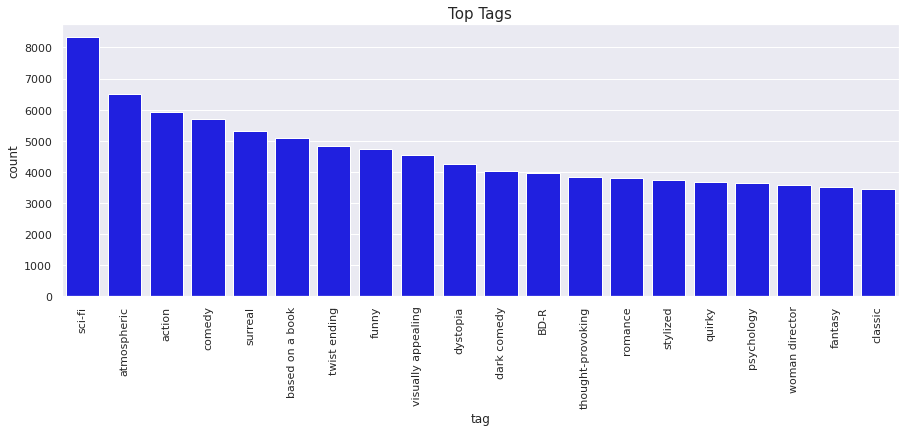

In [ ]:
#Plot tags 
plt.figure(figsize=(15, 5))
ax = sns.countplot(x=tags, order = tags.value_counts().index[:20],color = 'blue')
ax.set_title('Top Tags', fontsize=15)
plt.xticks(rotation=90)
plt.show

Sci-fi is the most popular tag while classic has the least number of counts.

<a id="features"></a>
## 5. **Feature engineering And Selection**

In this section, we extract features from raw data. The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process.

The features engineered for content-based and collaborative filtering are different because methods do not use the same dataset.

### **Content-based Filtering**

#### Feature Engineering

In [ ]:
cols = ['title','genres','title_cast','director','plot_keywords']

#create new dataframe with useful data
data_df = train_df[cols]

#set index to movie titles
data_df.set_index('title', inplace = True)

data_df.head()

,genres,title_cast,director,plot_keywords
title,,,,
Toy Story (1995),"[adventure, animation, children, comedy, fantasy]","[tomhanks, timallen, donrickles, jimvarney, wa...",johnlasseter,"[toy, rivalry, cowboy, cgi animation]"
Jumanji (1995),"[adventure, children, fantasy]","[robinwilliams, jonathanhyde, kirstendunst, br...",jonathanhensleigh,"[board game, adventurer, fight, game]"
Grumpier Old Men (1995),"[comedy, romance]","[waltermatthau, jacklemmon, sophialoren, ann-m...",markstevenjohnson,"[boat, lake, neighbor, rivalry]"
Waiting to Exhale (1995),"[comedy, drama, romance]","[whitneyhouston, angelabassett, lorettadevine,...",terrymcmillan,"[black american, husband wife relationship, be..."
Father of the Bride Part II (1995),[comedy],"[stevemartin, dianekeaton, martinshort, kimber...",alberthackett,"[fatherhood, doberman, dog, mansion]"


Now we create the bag of words from the genres, title_cast,director and plot keywords.

In [ ]:
data_df['bag_of_words'] = ''
columns = data_df.columns
for index, row in data_df.iterrows():
    words = ''
    for col in columns:
        if col != 'director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
data_df.drop(columns = [col for col in data_df.columns if col!= 'bag_of_words'], inplace = True)

**Vectorization**

The data we have is text, but machine learning algorithms operate on a numeric feature space, expecting input as a two-dimensional array where rows are instances and columns are features. In order to perform machine learning on text, we need to transform our documents into vector representations such that we can apply numeric machine learning. We make use of two vectorization techniques:

- CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

From the  bag of words, we generate numerical features.

In [ ]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(data_df['bag_of_words'])


####**Dimensionality Reduction**

This reduces the time and storage space required. It helps Remove multi-collinearity which improves the interpretation of the parameters of the machine learning model.

In [ ]:
# vectorized data
tfidfvectorizer = TfidfVectorizer(stop_words = 'english', max_features = 3)
tfidfvectorizer.fit(data_df['bag_of_words'])
tfidf_train = tfidfvectorizer.transform(data_df['bag_of_words']).toarray()
#features
vocab = tfidfvectorizer.get_feature_names()
#put into dataframe
new_data = pd.DataFrame(tfidf_train, columns = vocab)

In [ ]:
# define PCA object
pca = PCA()

# apply pca
data_pca = pca.fit_transform(new_data)

# find 85% of features
pca_85 = PCA(0.85)

pca_85.fit_transform(new_data)
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

88.0 % of variance explained by 2 components.


In [ ]:
new_matrix = count_matrix
# creating a Series for the movie titles.
indices = pd.Series(data_df.index)
indices[:10]

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
5                           Heat (1995)
6                        Sabrina (1995)
7                   Tom and Huck (1995)
8                   Sudden Death (1995)
9                      GoldenEye (1995)
Name: title, dtype: object

**Feature scaling**

It is possible for features to have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards certain features. 

MaxAbsScaler estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.


In [ ]:
# initialise a scaler

scaler = MaxAbsScaler() 

scaled_new_matrix = scaler.fit_transform(new_matrix) # scaled new_matrix


<a id="model"></a>
## 6. **Model Building And Evaluation**

The method of learning is unsupervised, hence this type of algorithm learns patterns from untagged data. The hope is that through mimicry, which is an important mode of learning in people, the machine is forced to build a compact internal representation of its world and then generate imaginative content from it. 

We use two forms of recommender system algorithms: content-based and collaborative filtering.

### **Content-based Filtering**

From the features engineered, we find the similarities within the data. This is done by computing the cosine similarity.

Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis.


In [ ]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

With our content similarity matrix computed,     

We now do recommendations by: 

  1. Select an initial item (movie) to generate recommendations from. 
  2. Extract all the similarity values between the initial item and each other item in the similarity matrix.
  3. Sort the resulting values in descending order. 
  4. Select the top N similarity values, and return the corresponding item details to the user.
  

In [ ]:
def recommendations(title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(data_df.index)[i])
        
    return recommended_movies

In [ ]:
# recommendations for the movie
recommendations('Hard Target (1993)')

### **Collaborative Filtering**

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. Because it’s based on historical data, the core assumption here is that the users who have agreed in the past tend to also agree in the future. In terms of user preference, it usually expressed by two categories, Explicit and Implicit rating.

**Explicit Rating**, is a rate given by a user to an item on a sliding scale, like 5 stars for Titanic. This is the most direct feedback from users to show how much they like an item.

**Implicit Rating**, suggests users preference indirectly, such as page views, clicks, purchase records, whether or not listen to a music track, and so on.

In this predict explicit rating will be used and suprise python library will be used. 

**Surprise** is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.


* Provides various ready-to-use prediction algorithms such as baseline algorithms, neighborhood methods, matrix factorization-based ( SVD, PMF, SVDpp, NMF), and many others.
* Provides tools to evaluate, analyse and compare the algorithms’ performance.

From the Suprise library, the following algorithms were used:

### Basic algorithms
***NormalPredictor:*** this algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal.

***BaselineOnly:*** this algorithm predicts the baseline estimate for given user and item.

### k-NN algorithms
***KNNBasic:*** this is a basic collaborative filtering algorithm.

***KNNWithMeans:*** this is a basic collaborative filtering algorithm, taking into account the mean ratings of each user.

***KNNWithZScore:*** this is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user.

***KNNBaseline:*** is a basic collaborative filtering algorithm taking into account a baseline rating.

### Matrix Factorization-based algorithms
***SVD:*** this algorithm is equivalent to Probabilistic Matrix Factorization ( which makes use of data provided by users with similar preferences to offer recommendations to a particular user).

***SVDpp:*** this algorithm is an extension of SVD that takes into account implicit ratings.

***NMF:*** this is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar with SVD.

***SlopeOne:*** this is a straightforward implementation of the SlopeOne algorithm.

***Coclustering:*** is a collaborative filtering algorithm based on co-clustering.


To reduce computation time, we train and evaluate the following models on a 10000 subset of the data. The best performing model will be trained on the whole dataset to predict the ratings for the final submission file.

**Implementing the Surprise Python Library** 

In [ ]:
train_df= train.copy()

In [ ]:
#Loading 10000 dataset
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].head(10000), Reader)

In [ ]:
#Implement an algorithm
algo = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), 
                  KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

#Read 10000 dataset
data2 = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].head(10000), Reader())

#Implementing algorithm for RMSE
algo_rmse=[]
for a in algo:
    
    cross_valid=cross_validate(a, data2, measures=['RMSE'], cv = 3)
    output=pd.DataFrame.from_dict(cross_valid).mean(axis=0)
    output=output.append(pd.Series([str(a).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    algo_rmse.append(output)

algo_rmse
surprise_results = pd.DataFrame(algo_rmse).set_index('Algorithm').sort_values('test_rmse')
surprise_results

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,1.044901,0.755242,0.030037
SVD,1.047178,0.460864,0.026529
KNNBaseline,1.047517,1.755264,0.027414
BaselineOnly,1.048623,0.040986,0.028174
KNNBasic,1.077094,1.326361,0.031142
SlopeOne,1.100096,0.299308,0.024578
KNNWithZScore,1.101319,1.425053,0.031514
KNNWithMeans,1.104031,1.452763,0.026947
NMF,1.105450,1.163473,0.025125


Based on the table above containing test_rmse, fit_time, test_time values for the algorithms, we notice that the SVDpp, SVD and BaselineOnly algorithms are top three best performing algorithms. Therefore the best performing algorithm will be used for prediction and to find the Root Mean Squared Error (RMSE) values.

**Predicting with SVDpp Algorithm**

In [ ]:
#Loading 100000 dataset
data3 = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].head(100000), Reader()) 

In [ ]:
trainset, testset = train_test_split(data3, test_size=0.05)

In [ ]:
from surprise import accuracy
#SVDpp model
svdpp=SVDpp(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)

#Fitting the model
svdpp.fit(trainset)

# Making prediction on the validation dataset
test_pred= svdpp.test(testset)

#Evaluating model performance
rsme_collabo = accuracy.rmse(test_pred,
                             verbose=True)

RMSE: 0.9770


In [ ]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test_df.itertuples(index=False):
    output=svdpp.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

,ID,est
0,1_2011,3.463220
1,1_4144,3.891585
2,1_5767,3.533011
3,1_6711,3.740572
4,1_7318,2.894527


**Predicting with SVD Algorithm**

In [ ]:
#Loading 1000000 dataset
data4 = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].head(1000000), Reader()) 

In [ ]:
trainset, testset = train_test_split(data4, test_size=0.05)

In [ ]:
from surprise import accuracy
#SVD model
svd=SVD(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)

#Fitting the model
svd.fit(trainset)

# Making prediction on the validation dataset
test_pred= svd.test(testset)

#Evaluating model performance
rsme_collabo = accuracy.rmse(test_pred,
                             verbose=True)

RMSE: 0.9049


In [ ]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test_df.itertuples(index=False):
    output=svd.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

,ID,est
0,1_2011,3.455345
1,1_4144,4.079019
2,1_5767,2.916231
3,1_6711,3.759732
4,1_7318,3.024385


#### Predicting with BaselineOnly Algorithm

In [ ]:
#Loading 1000000 dataset
data5 = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].head(1000000), Reader()) 

In [ ]:
trainset, testset = train_test_split(data5, test_size = 0.05)

In [ ]:
from surprise import accuracy
#BaselineOnly model
bsl_options = {'method': 'sgd','n_epochs': 40}
blo = BaselineOnly(bsl_options=bsl_options)

#Fitting the model
blo.fit(trainset)

# Making prediction on the validation dataset
test_pred= blo.test(testset)

#Evaluating model performance
rsme_collabo = accuracy.rmse(test_pred,
                             verbose=True)

Estimating biases using sgd...
RMSE: 0.8968


In [ ]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test.itertuples(index=False):
    output=blo.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

,ID,est
0,1_2011,3.380193
1,1_4144,4.065650
2,1_5767,2.692741
3,1_6711,3.572278
4,1_7318,3.000294


<a id="evaluation"></a>
## 7. **Model Parameter Tuning**

Hyperparameter tuning is the process of determining the right combination of hyperparameters that allows the model to maximize model performance. Setting the correct combination of hyperparameters is the only way to extract the maximum performance out of models.

We decided to hypertune the SVD algorithm model, which was the best performing amongst the top three algorithm (since it had the lowest RMSE value)

In [ ]:

# Hypertuning Singular Value Decomposition
rating_scale = Reader(rating_scale =(0.5, 5))

train_df = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], rating_scale)

# Training and validation set split for hypertuning
train_set, val_set = train_test_split(train_df,
                                      test_size = 0.001,
                                      random_state = 42)

# SVD hypertuning
svd_hyper = SVD(lr_all = 0.0085,
                     reg_all = 0.02,
                     n_epochs = 20,
                     init_std_dev = 0.01)
svd_hyper.fit(train_set)

# Predicting on the validation set
svd_hyper_predictions = svd_hyper.test(val_set)

# Convert the predictions to dataframe
accuracy.rmse(svd_hyper_predictions)

RMSE: 0.7797


0.779666275538175

In [ ]:
pred_svd_hyper = [svd_hyper.predict(row.userId,
                                         row.movieId) for idx,row in test.iterrows()]

# Converting the predictions to a dataframe
test_pred_svd_hyper = pd.DataFrame(pred_svd_hyper)

In [ ]:
# Rename the fields in the prediction dataframe
test_pred_svd_hyper.drop(['r_ui', 'details'], axis=1, inplace=True)
test_pred_svd_hyper = test_pred_svd_hyper.rename(columns={'uid':'userId',
                                                          'iid':'movieId',
                                                          'est':'rating'})
test_pred_svd_hyper.head()

,userId,movieId,rating
0,1,2011,3.028402
1,1,4144,4.209966
2,1,5767,3.779983
3,1,6711,4.112347
4,1,7318,2.966078


In [ ]:
# Concatenate each userId and movieId into a single Id column for submission
test_pred_svd_hyper['Id'] =  test_pred_svd_hyper['userId'].astype(str).str.zfill(1) + '_' + test_pred_svd_hyper['movieId'].astype(str).str.zfill(1)

In [ ]:
# making predictions for submission
svd_hyper_predictions = test_pred_svd_hyper[['Id','rating']]

In [ ]:
# creating csv file for submission
svd_hyper_predictions.to_csv('Team_14_subm.csv', index=False)

In [ ]:
params = {'method': 'svd_hyper','n_epochs': 20}

#metrics = accuracy.rmse(svd_hyper_predictions)

In [ ]:
# log our parameters and results
metrics = 0.7797
experiment.log_parameters(params)

experiment.log_parameters(metrics)

In [ ]:
# ending the experiment

experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/kwanda2426/streamlit-based-movie-recommender-system/373bdfb9e0dd4d44a8248f686b2979a8
COMET INFO:   Parameters:
COMET INFO:     imag     : 0.0
COMET INFO:     method   : svd_hyper
COMET INFO:     n_epochs : 20
COMET INFO:     real     : 0.789
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (10.66 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: T

<a id="conclusion"></a>
## 8. **Conclusion**

In this predict, we have implemented item-based collaborative filtering to recommend movies to users using different algorithms. The winning algorithm is the singular vector decomposition(SVD) for predicting the rating that the user would give to a movie that they have never seen.

The test Root Mean Squared Error of the SVD is 0.779666275538175 which way below the maximu of 0.85. This is a good the predictive accuracy of the model. It is collaborative based. The content-based filtering would not perform as good. 

The sparsity problem is the one thing that affect the performance of the algorith, where you find that some items or movies(as in our case), are not rated explicitly. It happens sometimes that the ratings are implicit. The algorithm must then be able to take into account the explicit and implicit ratings of movies. The other issue is that of dimensionality. In the case of implicit ratings, there's a risk of high dimesnsions when converting text to numerical data. This will result in computational limits and also multicollinearity. It is thus important to apply dimensionality reduction techniques to the data. The catch is that we need to specify the amaount of components or we need to carefully analyse how many dimensions we want to use.

Other similarity metrics such as the Pearson correlation coefficient and Jaccard similarity could also be explored. This is still an open area of research with the motive to provide the user with the most relevant items.

Collaborative filtering is one such recommendation technique that filters items of user interest based on user/item similarity. Due to ease of use and domain-free, it is being used and explored at a large scale by researchers. 

<a id="references"></a>
## 9. **References**

1. Hakami, A., 2022. Movie Recommendation system. [online] Medium. Available at: <https://medium.com/mlearning-ai/movie-recommendation-system-f2f57290b1b8> [Accessed 24 January 2022].

2. abramovsky, O., 2022. How to generate recommendations using TF-IDF. [online] Medium. Available at: <https://medium.com/codex/how-to-generate-recommendations-using-tf-idf-52d46eca606f> [Accessed 27 January 2022].

3. Youtube.com. 2022. Overview of recommender systems. [online] Available at: <https://www.youtube.com/watch?v=1JRrCEgiyHM> [Accessed 16 January 2022].

4. Youtube.com. 2022. Content-based Filtering. [online] Available at: <https://www.youtube.com/watch?v=2uxXPzm-7FY> [Accessed 16 January 2022].

5. Youtube.com. 2022. Collaborating Filtering. [online] Available at: <https://www.youtube.com/watch?v=h9gpufJFF-0> [Accessed 16 January 2022].